## Part 1: Introduction

### 1.1. Import libraries

In [348]:
import pandas as pd
import numpy as np 

# Sklearn modules for data splitting, preprocessing, model building and evaluation
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler

# Models to be used for classification
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Visualization
import matplotlib.pyplot as plt
from sklearn import tree
import seaborn as sns

# Evaluation metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix


### 1.2. Load Dataset

In [349]:
# df = pd.read_csv("../data/raw/train.csv") # stien til datafilen når det er i IdaData.ipynb
df = pd.read_csv("../data/raw/train.csv") # stien til datafilen når det er i data.ipynb

## Part 2: Data Preparation

### 2.1. Data Description and Inspection

In [350]:
# Print the shape of the dataframe
df.shape

(1048, 65)

In [351]:
# Print the first few rows of the dataframe
df.head()

,is_dater_male,dater_age,dated_age,age_difference,dater_race,dated_race,are_same_race,same_race_importance_for_dater,same_religion_importance_for_dater,attractiveness_importance_for_dated,...,interests_correlation,expected_satisfaction_of_dater,expected_number_of_likes_of_dater_from_20_people,expected_number_of_dates_for_dater,dater_liked_dated,probability_dated_wants_to_date,already_met_before,dater_wants_to_date,dated_wants_to_date,is_match
0,False,21,27,6,'Asian/Pacific Islander/Asian-American',caucasian,False,2.0,4.0,35.0,...,0.14,3.0,2,4,7.0,6.0,True,True,False,0
1,False,21,22,1,'Asian/Pacific Islander/Asian-American',caucasian,False,2.0,4.0,60.0,...,0.54,3.0,2,4,7.0,5.0,True,True,False,0
2,False,21,23,2,'Asian/Pacific Islander/Asian-American',caucasian,False,2.0,4.0,30.0,...,0.61,3.0,2,4,7.0,6.0,True,True,True,1
3,False,21,24,3,'Asian/Pacific Islander/Asian-American','Latino/Hispanic American',False,2.0,4.0,30.0,...,0.21,3.0,2,4,6.0,6.0,True,True,True,1
4,False,21,25,4,'Asian/Pacific Islander/Asian-American',caucasian,False,2.0,4.0,50.0,...,0.25,3.0,2,4,6.0,5.0,True,False,True,0


In [352]:
# Print the data types of each column
df.dtypes

is_dater_male                         bool
dater_age                            int64
dated_age                            int64
age_difference                       int64
dater_race                          object
                                    ...   
probability_dated_wants_to_date    float64
already_met_before                    bool
dater_wants_to_date                   bool
dated_wants_to_date                   bool
is_match                             int64
Length: 65, dtype: object

### 2.2. Data Preprocessing and Cleaning 

In [353]:
# Remove rows with missing values
df = df.dropna(subset=["is_match"])

In [354]:
# Change the column names to don't use underscores and to use upper first letters
df.columns = [col.replace('_', ' ').title() for col in df.columns]

In [355]:
# print all the column names
print(df.columns.tolist())

['Is Dater Male', 'Dater Age', 'Dated Age', 'Age Difference', 'Dater Race', 'Dated Race', 'Are Same Race', 'Same Race Importance For Dater', 'Same Religion Importance For Dater', 'Attractiveness Importance For Dated', 'Sincerity Importance For Dated', 'Intelligence Importance For Dated', 'Humor Importance For Dated', 'Ambition Importance For Dated', 'Shared Interests Importance For Dated', 'Attractiveness Score Of Dater From Dated', 'Sincerity Score Of Dater From Dated', 'Intelligence Score Of Dater From Dated', 'Humor Score Of Dater From Dated', 'Ambition Score Of Dater From Dated', 'Shared Interests Score Of Dater From Dated', 'Attractiveness Importance For Dater', 'Sincerity Importance For Dater', 'Intelligence Importance For Dater', 'Humor Importance For Dater', 'Ambition Importance For Dater', 'Shared Interests Importance For Dater', 'Self Reported Attractiveness Of Dater', 'Self Reported Sincerity Of Dater', 'Self Reported Intelligence Of Dater', 'Self Reported Humor Of Dater', '

In [356]:
# Store all column names before making changes
cols_before = set(df.columns)

# Drop unwanted columns (gender, religion, etc.)
df = df.drop(
    columns=[
        "Is Dater Male",
        "Dated Wants To Date",
        "Dater Wants To Date",
        "Same Race Importance For Dater",
        "Same Religion Importance For Dater"
    ],
    errors="ignore"  # ignore errors if any columns are missing
)

# Drop all columns containing the word 'Race'
race_cols = [col for col in df.columns if "Race" in col]
df = df.drop(columns=race_cols, errors="ignore")

# Compare column sets before and after to see which columns were removed for verification
cols_after = set(df.columns)
removed_cols = cols_before - cols_after

# Print removed columns
print("Removed columns:", removed_cols)

Removed columns: {'Same Religion Importance For Dater', 'Dater Wants To Date', 'Is Dater Male', 'Dated Wants To Date', 'Dater Race', 'Dated Race', 'Are Same Race', 'Same Race Importance For Dater'}


In [357]:
# Convert categorical variables to numerical dummy variables using one-hot encoding
df = pd.get_dummies(df, drop_first=True)
df.head()

,Dater Age,Dated Age,Age Difference,Attractiveness Importance For Dated,Sincerity Importance For Dated,Intelligence Importance For Dated,Humor Importance For Dated,Ambition Importance For Dated,Shared Interests Importance For Dated,Attractiveness Score Of Dater From Dated,...,Dater Interest In Shopping,Dater Interest In Yoga,Interests Correlation,Expected Satisfaction Of Dater,Expected Number Of Likes Of Dater From 20 People,Expected Number Of Dates For Dater,Dater Liked Dated,Probability Dated Wants To Date,Already Met Before,Is Match
0,21,27,6,35.0,20.0,20.0,20.0,0.0,5.0,6.0,...,8.0,1.0,0.14,3.0,2,4,7.0,6.0,True,0
1,21,22,1,60.0,0.0,0.0,40.0,0.0,0.0,7.0,...,8.0,1.0,0.54,3.0,2,4,7.0,5.0,True,0
2,21,23,2,30.0,5.0,15.0,40.0,5.0,5.0,7.0,...,8.0,1.0,0.61,3.0,2,4,7.0,6.0,True,1
3,21,24,3,30.0,10.0,20.0,10.0,10.0,20.0,8.0,...,8.0,1.0,0.21,3.0,2,4,6.0,6.0,True,1
4,21,25,4,50.0,0.0,30.0,10.0,0.0,10.0,7.0,...,8.0,1.0,0.25,3.0,2,4,6.0,5.0,True,0


In [358]:
# Print the shape of the dataframe after cleaning
df.shape

(1048, 57)

In [359]:
# Get summary statistics of the dataframe
df.describe()

,Dater Age,Dated Age,Age Difference,Attractiveness Importance For Dated,Sincerity Importance For Dated,Intelligence Importance For Dated,Humor Importance For Dated,Ambition Importance For Dated,Shared Interests Importance For Dated,Attractiveness Score Of Dater From Dated,...,Dater Interest In Music,Dater Interest In Shopping,Dater Interest In Yoga,Interests Correlation,Expected Satisfaction Of Dater,Expected Number Of Likes Of Dater From 20 People,Expected Number Of Dates For Dater,Dater Liked Dated,Probability Dated Wants To Date,Is Match
count,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,...,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000
mean,25.005725,24.818702,3.032443,23.728235,16.971021,22.255887,17.325029,9.725792,10.333626,6.211355,...,7.710878,5.511450,4.133588,0.154990,5.378817,5.760496,2.844466,6.218034,4.978053,0.177481
std,3.270365,3.180581,2.427732,12.660571,7.450629,7.352106,6.666005,7.073420,6.763784,1.964935,...,1.899931,2.597821,2.696578,0.335816,1.630245,4.954703,2.370152,1.858517,2.269876,0.382258
min,18.000000,18.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,-0.630000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,22.000000,1.000000,15.000000,10.000000,20.000000,10.832500,5.000000,5.000000,5.000000,...,7.000000,4.000000,2.000000,-0.110000,5.000000,2.000000,1.000000,5.000000,3.000000,0.000000
50%,25.000000,25.000000,2.000000,20.000000,18.000000,20.000000,18.180000,10.000000,10.000000,6.000000,...,8.000000,5.000000,3.000000,0.150000,5.000000,4.000000,2.000000,6.000000,5.000000,0.000000
75%,27.000000,27.000000,4.000000,30.000000,20.000000,25.000000,20.000000,15.000000,15.000000,8.000000,...,9.000000,8.000000,7.000000,0.420000,7.000000,8.000000,4.000000,7.000000,7.000000,0.000000
max,35.000000,35.000000,14.000000,100.000000,40.000000,50.000000,40.000000,53.000000,30.000000,10.000000,...,10.000000,10.000000,10.000000,0.900000,9.000000,20.000000,10.000000,10.000000,10.000000,1.000000


### 2.3. Split Features and Target Variable

In [360]:
# Split the data into features and target variable
# "Is Match" is the target variable and is binary (0 or 1) indicating if there was a match or not
X = df.drop("Is Match", axis=1)
y = df["Is Match"]

# 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.20, # the dataset is small, so use 20% for testing
    stratify=y,
    random_state=42
)

print(f"Train: {len(X_train)}, Test: {len(X_test)}")

# Define K-fold cross-validation on the training data
# This 'cv' object will be used later when training/evaluating models
# CV means cross-validation
cv = StratifiedKFold(
    n_splits=5,
    shuffle=True,
    random_state=42
)

Train: 838, Test: 210


## Part 3: Modelling

### 3.1. Baseline Model

=== DummyClassifier (Most Frequent) ===
Accuracy:  0.824
Precision: 0.000
Recall:    0.000
F1-score:  0.000

Classification report:
              precision    recall  f1-score   support

           0       0.82      1.00      0.90       173
           1       0.00      0.00      0.00        37

    accuracy                           0.82       210
   macro avg       0.41      0.50      0.45       210
weighted avg       0.68      0.82      0.74       210

Confusion matrix:
[[173   0]
 [ 37   0]]


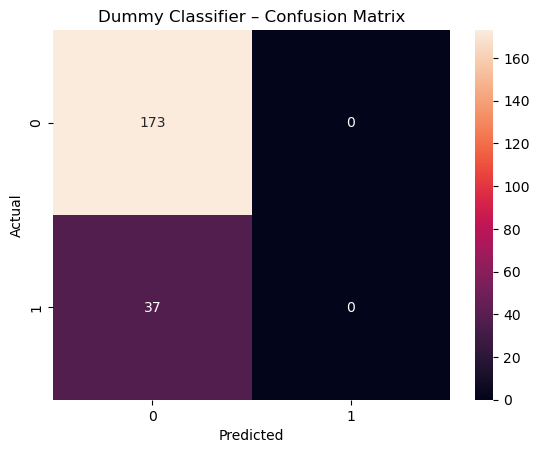

In [361]:
# Baseline model: always predicts the most frequent class in y_train
dummy_clf = DummyClassifier(strategy='most_frequent')

# Train on the *original* training data
dummy_clf.fit(X_train, y_train)

# Predict on test data
y_pred_dummy = dummy_clf.predict(X_test)

# Metrics
accuracy_dummy = accuracy_score(y_test, y_pred_dummy)
precision_dummy = precision_score(y_test, y_pred_dummy, zero_division=0)
recall_dummy = recall_score(y_test, y_pred_dummy, zero_division=0)
f1_dummy = f1_score(y_test, y_pred_dummy, zero_division=0)

print("=== DummyClassifier (Most Frequent) ===")
print(f"Accuracy:  {accuracy_dummy:.3f}")
print(f"Precision: {precision_dummy:.3f}")
print(f"Recall:    {recall_dummy:.3f}")
print(f"F1-score:  {f1_dummy:.3f}\n")

print("Classification report:")
print(classification_report(y_test, y_pred_dummy, zero_division=0))

# Confusion matrix
cm_dummy = confusion_matrix(y_test, y_pred_dummy)
print("Confusion matrix:")
print(cm_dummy)

sns.heatmap(cm_dummy, annot=True, fmt="d")
plt.title("Dummy Classifier – Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()




### 3.2. Logistic Regression

In [362]:
# Build a pipeline: scaling + model
log_reg_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("log_reg", LogisticRegression(max_iter=1000))
])

# Run cross-validation on the training data
lt_cv_scores = cross_val_score(
    log_reg_pipeline,
    X_train,
    y_train,
    cv=cv,
    scoring="accuracy"
)

print("Logisitic Regression CV Scores:", lt_cv_scores)
print("Logisitic Regression mean CV Score:", lt_cv_scores.mean())

Logisitic Regression CV Scores: [0.85119048 0.8452381  0.83928571 0.85628743 0.8742515 ]
Logisitic Regression mean CV Score: 0.8532506415739949


#### 3.3. Decision Tree

In [363]:
# Decision Tree without scaling (tree models are scale-invariant)
dt_model = DecisionTreeClassifier(
    random_state=42
)

# Run cross-validation on the training data for performance evaluation
dt_acc_scores = cross_val_score(
    dt_model,
    X_train,
    y_train,
    cv=cv,
    scoring="accuracy"
)

# F1-score
dt_f1_scores = cross_val_score(
    dt_model,
    X_train,
    y_train,
    cv=cv,
    scoring="f1"
)

# Recall
dt_recall_scores = cross_val_score(
    dt_model,
    X_train,
    y_train,
    cv=cv,
    scoring="recall"
)

# Precision
dt_pre_scores = cross_val_score(
    dt_model,
    X_train,
    y_train,
    cv=cv,
    scoring="precision"
)

# Print Decision Tree CV scores
print("KNN CV Accuracy scores:", dt_acc_scores)
print("KNN mean Accuracy:", dt_acc_scores.mean())

print("KNN CV F1 scores:", dt_f1_scores)
print("KNN mean F1:", dt_f1_scores.mean())

print("KNN CV Recall scores:", dt_recall_scores)
print("KNN mean Recall:", dt_recall_scores.mean())

print("KNN CV Precision scores:", dt_pre_scores)
print("KNN mean Precision:", dt_pre_scores.mean())


KNN CV Accuracy scores: [0.81547619 0.80952381 0.78571429 0.75449102 0.78443114]
KNN mean Accuracy: 0.7899272882805817
KNN CV F1 scores: [0.47457627 0.46666667 0.35714286 0.34920635 0.4375    ]
KNN mean F1: 0.4170184288404627
KNN CV Recall scores: [0.46666667 0.46666667 0.33333333 0.37931034 0.46666667]
KNN mean Recall: 0.42252873563218396
KNN CV Precision scores: [0.48275862 0.46666667 0.38461538 0.32352941 0.41176471]
KNN mean Precision: 0.413866957923753


#### 3.3.2. Fine-Tune Decision Tree with GridSearchCV

In [364]:
# Hyperparameter grid
param_grid = {
    "max_depth": [None, 3, 5, 10],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 5]
}

# Only the 4 metrics we care about
scoring = {
    "accuracy": make_scorer(accuracy_score),
    "precision": make_scorer(precision_score, zero_division=0),
    "recall": make_scorer(recall_score, zero_division=0),
    "f1": make_scorer(f1_score, zero_division=0)
}

# GridSearch
dt_grid = GridSearchCV(
    estimator=dt_model,
    param_grid=param_grid,
    scoring=scoring,
    refit="f1",   # model selection based on F1
    cv=cv,
    n_jobs=-1
)

# Fit
dt_grid.fit(X_train, y_train)

print("Best params:", dt_grid.best_params_)
print("Best CV F1 (refit metric):", dt_grid.best_score_)

# Also report best scores for the other metrics for the selected best_index_
best_i = dt_grid.best_index_
cvres = dt_grid.cv_results_

print("CV Accuracy at best F1:", cvres["mean_test_accuracy"][best_i])
print("CV Recall at best F1:",   cvres["mean_test_recall"][best_i])
print("CV F1 at best F1:",       cvres["mean_test_f1"][best_i])
print("CV precision at best F1:",cvres["mean_test_precision"][best_i])

Best params: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5}
Best CV F1 (refit metric): 0.48946414929608206
CV Accuracy at best F1: 0.8437197034502424
CV Recall at best F1: 0.41632183908045983
CV F1 at best F1: 0.48946414929608206
CV precision at best F1: 0.595984962406015


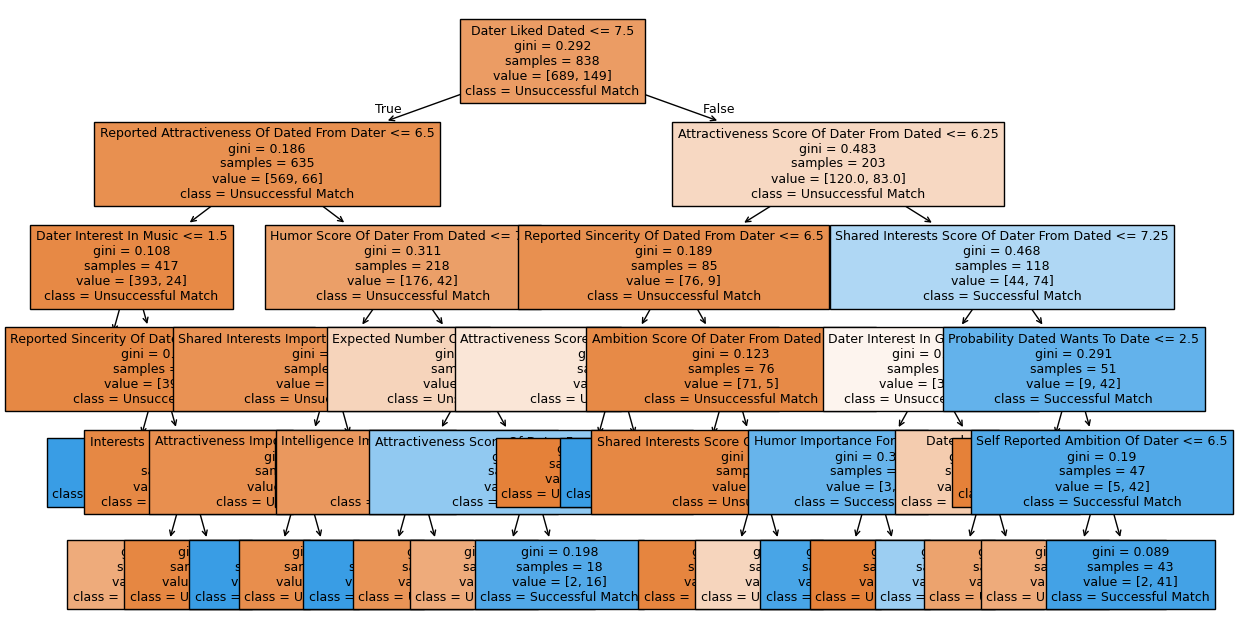

In [365]:
# Visualize the Decision Tree
best_dt = dt_grid.best_estimator_

plt.figure(figsize=(14, 8))
tree.plot_tree(
    best_dt,
    feature_names=list(X_train.columns),
    class_names=["Unsuccessful Match", "Successful Match"],
    filled=True,
    fontsize=9
)
plt.show()

##### 3.3.1. Reduced Decision Tree for Visualization

In [366]:
# Create a reduced Decision Tree for visualization with max depth of 3
dtree_small = DecisionTreeClassifier(
    random_state=42,
    max_depth=3
)

# Fit the reduced Decision Tree model on the training data
dtree_small.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

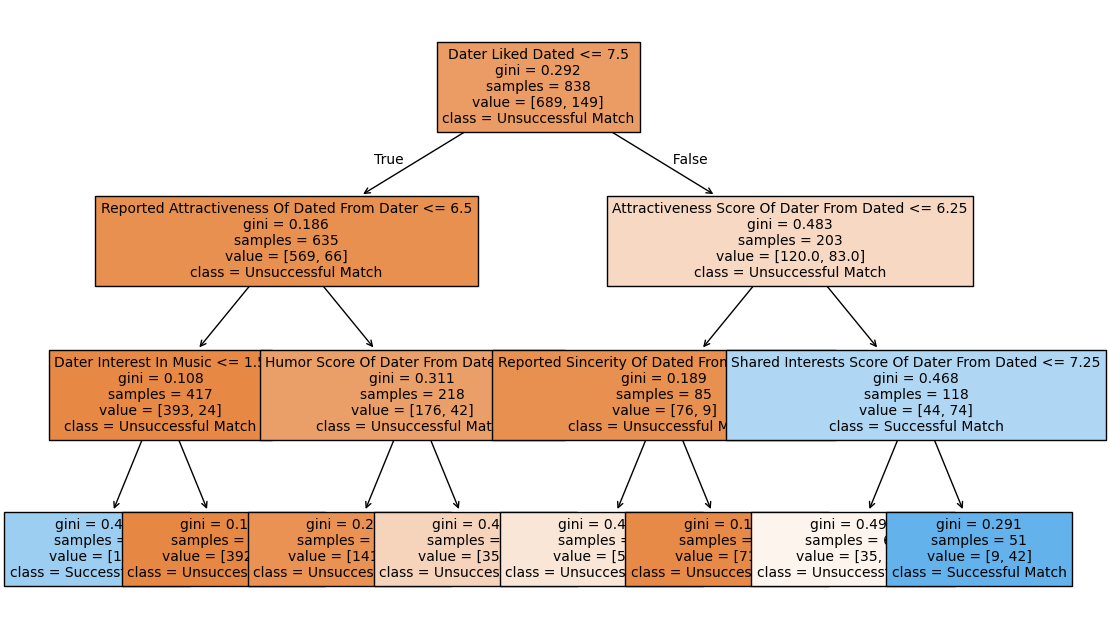

In [367]:
# Visualize the Decision Tree
# Create a figure with specified size
plt.figure(figsize=(13, 8))

# Plot the tree
tree.plot_tree(
    dtree_small,
class_names=["Unsuccessful Match", "Successful Match"],
    feature_names=list(X_train.columns),
    filled=True,
    fontsize=10
)

# Save the figure
plt.savefig("reduced_tree.png", bbox_inches="tight")

# Show the plot
plt.show()

#### 3.4. Random Forest

In [368]:
# Random Forest without scaling
rf_model = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)

# Run cross-validation on the training data
rf_cv_scores = cross_val_score(
    rf_model,
    X_train,
    y_train,
    cv=cv,
    scoring="accuracy"
)

# Print Random Forest CV scores
print("Random Forest CV scores:", rf_cv_scores)
print("Random Forest mean CV score:", rf_cv_scores.mean())

Random Forest CV scores: [0.85119048 0.86904762 0.8452381  0.84431138 0.86227545]
Random Forest mean CV score: 0.8544126033646992


#### 3.5. K-Nearest Neighbors

In [369]:
knn_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("knn", KNeighborsClassifier(
        n_neighbors=15,
        weights="distance",
        p=2
    ))
])

knn_cv_scores = cross_val_score(
    knn_pipeline,
    X_train,
    y_train,
    cv=cv,
    scoring="accuracy"
)


print("KNN CV scores (scaled):", knn_cv_scores)
print("KNN mean CV score (scaled):", knn_cv_scores.mean())


pipe = Pipeline([
    ("scaler", StandardScaler()),          # placeholder
    ("knn", KNeighborsClassifier())
])

param_grid = {
    "scaler": [StandardScaler(), RobustScaler(), "passthrough"],
    "knn__n_neighbors": [3, 6, 9,12,15,19, 24, 48, 96],
    "knn__weights": ["uniform", "distance"],
    "knn__p": [1, 2],                      # 1=Manhattan, 2=Euclidean
}

grid_search = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    cv=cv,                                 # use your existing cv object
    scoring="accuracy",                    # or "roc_auc" if you want ranking quality
    return_train_score=True,
    n_jobs=-1,
    verbose=3
)

grid_search.fit(X_train, y_train)

print("Best params:", grid_search.best_params_)
print("Best CV score:", grid_search.best_score_)

KNN CV scores (scaled): [0.83333333 0.85119048 0.83928571 0.82634731 0.86826347]
KNN mean CV score (scaled): 0.8436840604505275
Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV 1/5] END knn__n_neighbors=3, knn__p=1, knn__weights=uniform, scaler=StandardScaler();, score=(train=0.879, test=0.815) total time=   0.0s
[CV 2/5] END knn__n_neighbors=3, knn__p=1, knn__weights=uniform, scaler=StandardScaler();, score=(train=0.876, test=0.833) total time=   0.0s
[CV 4/5] END knn__n_neighbors=3, knn__p=1, knn__weights=uniform, scaler=StandardScaler();, score=(train=0.900, test=0.802) total time=   0.0s
[CV 3/5] END knn__n_neighbors=3, knn__p=1, knn__weights=uniform, scaler=StandardScaler();, score=(train=0.891, test=0.804) total time=   0.0s
[CV 5/5] END knn__n_neighbors=3, knn__p=1, knn__weights=uniform, scaler=StandardScaler();, score=(train=0.879, test=0.808) total time=   0.0s
[CV 2/5] END knn__n_neighbors=3, knn__p=1, knn__weights=uniform, scaler=RobustScaler();, score=(tra

### 4. Results and Evaluation
#### 4.1. Results From the Models

In [370]:
# Collect CV results from the three models
results = {
    "Logistic Regression": lt_cv_scores.mean(),
    "Decision Tree": dt_cv_scores.mean(),
    "Random Forest": rf_cv_scores.mean()
}

# Convert to a clean table
results_table = pd.DataFrame({
    "Model": list(results.keys()),
    "Mean CV Accuracy": [round(v, 4) for v in results.values()]
})

# Display results sorted by accuracy
results_table.sort_values("Mean CV Accuracy", ascending=False).reset_index(drop=True)

,Model,Mean CV Accuracy
0,Random Forest,0.8544
1,Logistic Regression,0.8533
2,Decision Tree,0.7899


Exception ignored in: <function ResourceTracker.__del__ at 0x107249bc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x102aedbc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x1030c9bc0>
Traceback (most recent call last

### ?. Test Performance